# Forcing comparison for the historical period

Compare first one- and three-feedback parameter forcing estimates

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotting_functions import *
from estimation import *
import matplotlib.gridspec as gridspec

In [2]:
directory = '../Estimates/Transient_forcing_estimates/'
models = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']
models.sort()
models

['ACCESS-CM2',
 'ACCESS-ESM1-5',
 'AWI-CM-1-1-MR',
 'BCC-CSM2-MR',
 'BCC-ESM1',
 'CAMS-CSM1-0',
 'CESM2',
 'CESM2-FV2',
 'CESM2-WACCM',
 'CESM2-WACCM-FV2',
 'CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CNRM-CM6-1',
 'CNRM-CM6-1-HR',
 'CNRM-ESM2-1',
 'CanESM5',
 'E3SM-1-0',
 'EC-Earth3',
 'EC-Earth3-AerChem',
 'EC-Earth3-CC',
 'EC-Earth3-Veg',
 'FGOALS-f3-L',
 'FGOALS-g3',
 'GFDL-CM4',
 'GFDL-ESM4',
 'GISS-E2-1-G',
 'GISS-E2-1-H',
 'GISS-E2-2-G',
 'GISS-E2-2-H',
 'HadGEM3-GC31-LL',
 'HadGEM3-GC31-MM',
 'ICON-ESM-LR',
 'IITM-ESM',
 'INM-CM4-8',
 'INM-CM5-0',
 'IPSL-CM5A2-INCA',
 'IPSL-CM6A-LR',
 'KIOST-ESM',
 'MIROC-ES2L',
 'MIROC6',
 'MPI-ESM-1-2-HAM',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'MRI-ESM2-0',
 'NESM3',
 'NorCPM1',
 'NorESM2-LM',
 'NorESM2-MM',
 'SAM0-UNICON',
 'TaiESM1',
 'UKESM1-0-LL']

## Figure with the member means of all models

historical
CNRM-CM6-1 member r11i1p1f2 excluded
CNRM-CM6-1 member r12i1p1f2 excluded
CNRM-CM6-1 member r13i1p1f2 excluded
CNRM-CM6-1 member r14i1p1f2 excluded
CNRM-CM6-1 member r15i1p1f2 excluded
CNRM-CM6-1 member r16i1p1f2 excluded
CNRM-CM6-1 member r17i1p1f2 excluded
CNRM-CM6-1 member r18i1p1f2 excluded
CNRM-CM6-1 member r19i1p1f2 excluded
CNRM-CM6-1 member r20i1p1f2 excluded
CNRM-CM6-1 member r26i1p1f2 excluded
CNRM-CM6-1 member r27i1p1f2 excluded
CNRM-CM6-1 member r28i1p1f2 excluded
CNRM-CM6-1 member r29i1p1f2 excluded
CNRM-CM6-1 member r30i1p1f2 excluded
E3SM-1-0 historical r1i1p1f1 150
E3SM-1-0 historical r4i1p1f1 150
EC-Earth3-Veg historical r10i1p1f1 164
hist-GHG
hist-nat
hist-aer


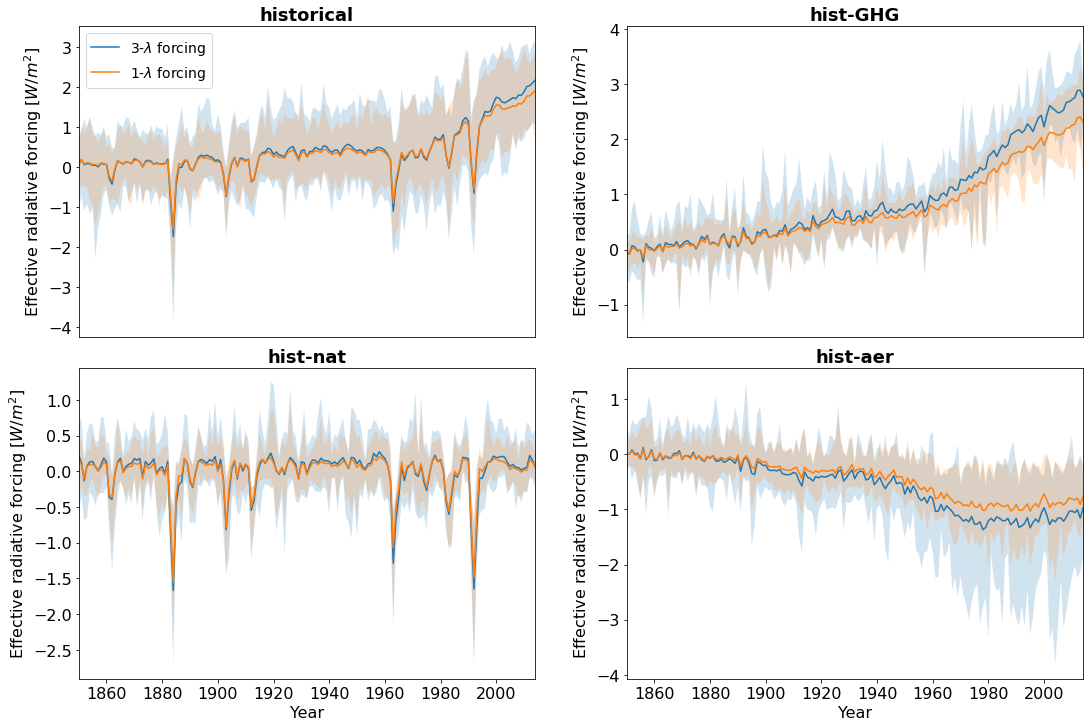

In [3]:
experiments = ['historical', 'hist-GHG', 'hist-nat', 'hist-aer']

explength = 165
startyear = 1850
years = np.arange(startyear, startyear+explength)

# assign one color to each model:
palette = sns.color_palette(None, 2)

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = [18,12]);
ax = np.concatenate(axes)

plt.subplots_adjust(hspace=0.1, wspace = 0.2)
member_means_3lambda = {}
member_means_1lambda = {}
for (k,exp) in enumerate(experiments):
    print(exp)
    member_means_3lambda[exp] = pd.DataFrame(index = years)
    member_means_1lambda[exp] = pd.DataFrame(index = years)
    ax[k].tick_params(axis='both',labelsize=16);
    ax[k].set_title(exp, fontsize=18, fontweight = 'bold')
    ax[k].set_ylabel('Effective radiative forcing [$W/m^2$]',fontsize = 16)
    if k in [2,3]:
        ax[k].set_xlabel('Year', fontsize = 16)
    else:
        ax[k].axes.xaxis.set_visible(False)
    ax[k].set_xlim(years[0],years[-1]);
    
    for model in models:
        startind = 0
        expstr = exp

        modeldirectory = os.path.join(directory, model)
        modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
        if exp in modelexp_names:
            members = find_members(model, exp, datatype = 'forcing')
            members = list(dict.fromkeys(members)) # drop duplicates
        else:
            continue

        model_ERFs = np.full((explength, len(members)), np.nan)
        model_ERFs_F13 = np.full((explength, len(members)), np.nan)
        for (m, member) in enumerate(members):
            modelfilename = model + '_' + expstr + '_' + member + '_ERF.csv'
            modelexpdir = os.path.join(directory, model, exp)
            ERF_df = pd.read_csv(modelexpdir + '/' + modelfilename,index_col=0)
            ERF = ERF_df.reset_index('Year')['ERF'].values[startind:(startind+explength)]
            
            if len(ERF) != explength:
                print(model, exp, member, len(ERF))

            # repeat for F13 forcing
            modelfilename = model + '_' + expstr + '_' + member + '_F13_ERF.csv'
            ERF_F13_df = pd.read_csv(modelexpdir + '/' + modelfilename,index_col=0)
            ERF_F13 = ERF_F13_df.reset_index('Year')['ERF'].values[startind:(startind+explength)]

            r_value = int(member.split("r")[1].split("i")[0])
            cnrmcm61_excl_members = list(range(11, 21)) + list(range(26, 31))
            if model == 'EC-Earth3' and exp == 'historical' and r_value >=102: 
                # duplicate values before 1970 should be ignored in average
                # but keep all data for member r101
                model_ERFs[121:, m] = np.squeeze(ERF)[121:]
            elif model == 'CNRM-CM6-1' and r_value in cnrmcm61_excl_members:
                print('CNRM-CM6-1 member', member, 'excluded')
            else:       
                model_ERFs[:len(ERF), m] = np.squeeze(ERF)
                model_ERFs_F13[:len(ERF_F13), m] = np.squeeze(ERF_F13)

        # plot thicker lines for mean of members (also models with only one member)
        member_means_3lambda[exp][model] = np.nanmean(model_ERFs, axis=1)
        member_means_1lambda[exp][model] = np.nanmean(model_ERFs_F13, axis=1)

        
    ax[k].fill_between(years, member_means_3lambda[exp].min(axis=1), member_means_3lambda[exp].max(axis=1), facecolor=palette[0],alpha=0.2)
    ax[k].fill_between(years, member_means_1lambda[exp].min(axis=1), member_means_1lambda[exp].max(axis=1), facecolor=palette[1],alpha=0.2)
    
    ax[k].plot(member_means_3lambda[exp].mean(axis=1), color = palette[0], label = '3-$\lambda$ forcing')
    ax[k].plot(member_means_1lambda[exp].mean(axis=1), color = palette[1], label = '1-$\lambda$ forcing')

    if exp == 'historical':
        ax[k].legend(fontsize=14, loc = 'upper left')
    #plt.savefig('../Figures/historical_forcings_plot.pdf', format='pdf', dpi=600, bbox_inches="tight")


In [ ]:
for exp in ['hist-GHG', 'hist-nat', 'hist-aer']:
    #display(member_means_3lambda[exp])
    #member_means_3lambda[exp].to_csv('../Estimates/member_mean_ERF_' + exp + '.csv')

In [ ]:
year

In [ ]:
member_means_3lambda['hist-GHG']

## Similar figure with the corresponding temperature differences for the 3-lambda forcing

historical
CNRM-CM6-1 member r11i1p1f2 excluded
CNRM-CM6-1 member r12i1p1f2 excluded
CNRM-CM6-1 member r13i1p1f2 excluded
CNRM-CM6-1 member r14i1p1f2 excluded
CNRM-CM6-1 member r15i1p1f2 excluded
CNRM-CM6-1 member r16i1p1f2 excluded
CNRM-CM6-1 member r17i1p1f2 excluded
CNRM-CM6-1 member r18i1p1f2 excluded
CNRM-CM6-1 member r19i1p1f2 excluded
CNRM-CM6-1 member r20i1p1f2 excluded
CNRM-CM6-1 member r26i1p1f2 excluded
CNRM-CM6-1 member r27i1p1f2 excluded
CNRM-CM6-1 member r28i1p1f2 excluded
CNRM-CM6-1 member r29i1p1f2 excluded
CNRM-CM6-1 member r30i1p1f2 excluded
E3SM-1-0 historical r1i1p1f1 150
E3SM-1-0 historical r4i1p1f1 150
EC-Earth3-Veg historical r10i1p1f1 164
hist-GHG
hist-nat
hist-aer


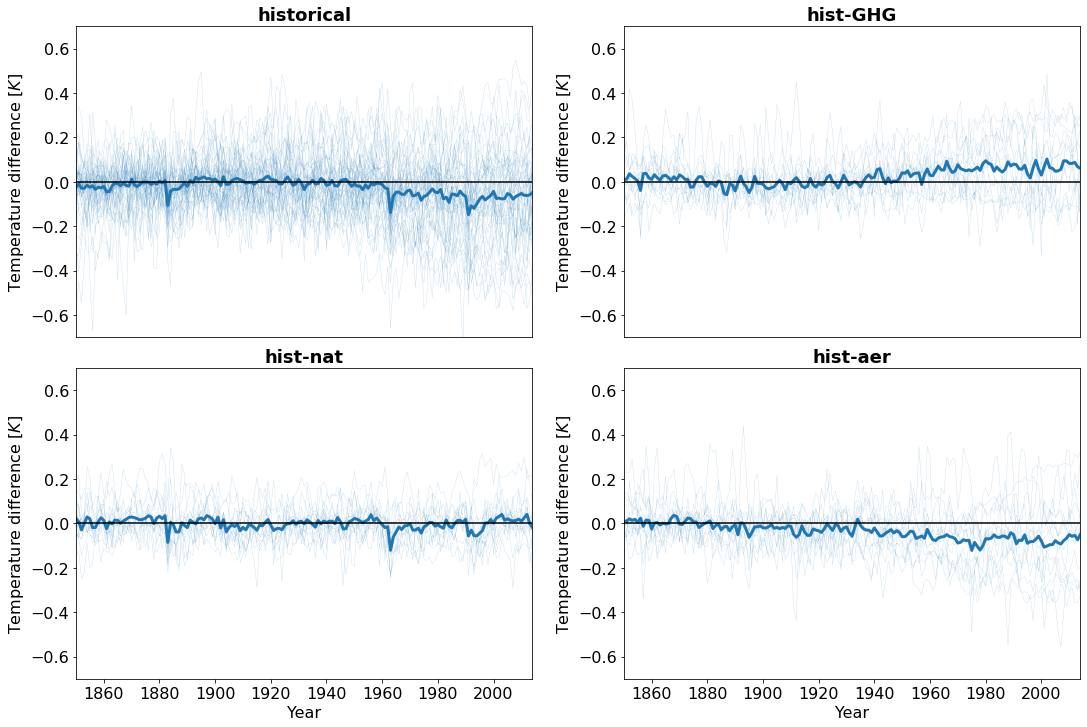

In [8]:

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = [18,12]);
ax = np.concatenate(axes)

plt.subplots_adjust(hspace=0.1, wspace = 0.2)
member_means_3lambda = {}
for (k,exp) in enumerate(experiments):
    print(exp)
    member_means_3lambda[exp] = pd.DataFrame(index = years)
    ax[k].tick_params(axis='both',labelsize=16);
    ax[k].set_title(exp, fontsize=18, fontweight = 'bold')
    ax[k].set_ylabel('Temperature difference [$K$]',fontsize = 16)
    if k in [2,3]:
        ax[k].set_xlabel('Year', fontsize = 16)
    else:
        ax[k].axes.xaxis.set_visible(False)
    ax[k].set_xlim(years[0],years[-1]);
    
    for model in models:
        startind = 0
        expstr = exp

        modeldirectory = os.path.join(directory, model)
        modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
        if exp in modelexp_names:
            members = find_members(model, exp, datatype = 'forcing')
            members = list(dict.fromkeys(members)) # drop duplicates
        else:
            continue

        model_tas_diffs = np.full((explength, len(members)), np.nan)
        for (m, member) in enumerate(members):
            modelfilename = model + '_' + expstr + '_' + member + '_tas_diff.csv'
            modelexpdir = os.path.join(directory, model, exp)
            tas_diff_df = pd.read_csv(modelexpdir + '/' + modelfilename,index_col=0)
            tas_diff = tas_diff_df.reset_index('Year')['tas_diff'].values[startind:(startind+explength)]
            
            if len(tas_diff) != explength:
                print(model, exp, member, len(tas_diff))

            r_value = int(member.split("r")[1].split("i")[0])
            cnrmcm61_excl_members = list(range(11, 21)) + list(range(26, 31))
            if model == 'EC-Earth3' and exp == 'historical' and r_value >=102: 
                # duplicate values before 1970 should be ignored in average
                # but keep all data for member r101
                model_tas_diffs[121:, m] = np.squeeze(tas_diff)[121:]
            elif model == 'CNRM-CM6-1' and r_value in cnrmcm61_excl_members:
                print('CNRM-CM6-1 member', member, 'excluded')
            else:       
                model_tas_diffs[:len(tas_diff), m] = np.squeeze(tas_diff)

        # plot thicker lines for mean of members (also models with only one member)
        member_means_3lambda[exp][model] = np.nanmean(model_tas_diffs, axis=1)
        ax[k].plot(member_means_3lambda[exp][model], color = palette[0], linewidth = 0.3, alpha = 0.3)

        
    #ax[k].fill_between(years, member_means_3lambda[exp].min(axis=1), member_means_3lambda[exp].max(axis=1), facecolor=palette[0],alpha=0.2)
    
    ax[k].plot(member_means_3lambda[exp].mean(axis=1), color = palette[0], linewidth = 3)
    ax[k].set_ylim(-0.7, 0.7)
    ax[k].axhline(0, color = 'black')
    #if exp == 'historical':
    #    ax[k].legend(fontsize=14, loc = 'upper left')
    plt.savefig('../Figures/historical_tas_diffs_plot.pdf', format='pdf', dpi=600, bbox_inches="tight")


In [ ]:
year

## One figure for each model:

In [ ]:
experiments = ['historical', 'hist-GHG', 'hist-nat', 'hist-aer']
forcing_diffs = {}

explength = 165
startyear = 1850
nrows = len(experiments)

# assign one color to each model:
palette = sns.color_palette(None, 2)
    
for model in models:
    #for model in [models[0]]:
    print(model)

    fig = plt.figure(figsize = [18,12]);
    plt.subplots_adjust(hspace=0.2, wspace = 0.1)
    outer = gridspec.GridSpec(nrows, 1)

    forcing_diffs[model] = {}

    for (k,exp) in enumerate(experiments):
        print(exp)
        gs_k = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec = outer[k], hspace = 0.1)
        f_plot = fig.add_subplot(gs_k[0])
        t_plot = fig.add_subplot(gs_k[1])

        f_plot.tick_params(axis='both',labelsize=14); t_plot.tick_params(axis='both',labelsize=14)  
        f_plot.set_ylabel(exp, fontsize=14, fontweight = 'bold')
        #t_plot.set_ylabel('T(t) [°C]', fontsize=14)
        t_plot.axhline(0, color='k', linewidth = 0.5) # horizontal lines
        if exp == experiments[0]: # top row
            f_plot.set_title(model + ' effective radiative forcing [$W/m^2$]',fontsize = 18)
            t_plot.set_title(model + ' temperature difference [°C]',fontsize = 18)

        startind = 0
        expstr = exp
        
        years = np.arange(startyear, startyear+explength)
        f_plot.set_xlim(years[0],years[-1]);# f_plot.set_ylim(-2.5,6.5)
        t_plot.set_xlim(years[0],years[-1]);# t_plot.set_ylim(-0.5,0.8)

        modeldirectory = os.path.join(directory, model)
        modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
        if exp in modelexp_names:
            members = find_members(model, exp, datatype = 'forcing')
            members = list(dict.fromkeys(members)) # drop duplicates
        else:
            continue

        model_ERFs = np.full((explength, len(members)), np.nan)
        model_ERFs_F13 = np.full((explength, len(members)), np.nan)
        model_tas_diffs = np.full((explength, len(members)), np.nan)
        model_member_means_3lambdas = np.full((explength, len(members)), np.nan)
        for (m, member) in enumerate(members): # plot very thin lines for individual members
            modelfilename = model + '_' + expstr + '_' + member + '_ERF.csv'
            tas_filename = model + '_' + expstr + '_' + member + '_tas_diff.csv'
            modelexpdir = os.path.join(directory, model, exp)
            ERF_df = pd.read_csv(modelexpdir + '/' + modelfilename,index_col=0)
            ERF = ERF_df.reset_index('Year')['ERF'].values[startind:(startind+explength)]
            if len(ERF) != explength:
                print(model, exp, member, len(ERF))
            tas_diff_df = pd.read_csv(modelexpdir + '/' + tas_filename,index_col=0)#.values[startind:(startind+explength)]
            tas_diff = tas_diff_df.reset_index('Year')['tas_diff'].values[startind:(startind+explength)]
            f_plot.plot(years[:len(ERF)], ERF, linewidth = 0.1, color = palette[0])
            t_plot.plot(years[:len(tas_diff)], tas_diff, linewidth = 0.1, color = palette[0])
            
            # repeat for F13 forcing
            modelfilename = model + '_' + expstr + '_' + member + '_F13_ERF.csv'
            ERF_F13_df = pd.read_csv(modelexpdir + '/' + modelfilename,index_col=0)
            ERF_F13 = ERF_F13_df.reset_index('Year')['ERF'].values[startind:(startind+explength)]
            f_plot.plot(years[:len(ERF_F13)], ERF_F13, linewidth = 0.1, color = palette[1])

            r_value = int(member.split("r")[1].split("i")[0])
            cnrmcm61_excl_members = list(range(11, 21)) + list(range(26, 31))
            if model == 'EC-Earth3' and exp == 'historical' and r_value >=102: 
                # duplicate values before 1970 should be ignored in average
                # but keep all data for member r101
                model_ERFs[121:, m] = np.squeeze(ERF)[121:]
                model_tas_diffs[121:, m] = np.squeeze(tas_diff)[121:]
            elif model == 'CNRM-CM6-1' and r_value in cnrmcm61_excl_members:
                print('CNRM-CM6-1 member', member, 'excluded')
            else:       
                model_ERFs[:len(ERF), m] = np.squeeze(ERF)
                model_ERFs_F13[:len(ERF_F13), m] = np.squeeze(ERF_F13)
                model_tas_diffs[:len(tas_diff), m] = np.squeeze(tas_diff)

        # plot thicker lines for mean of members (also models with only one member)
        member_mean_ERF = np.nanmean(model_ERFs, axis=1)
        member_mean_ERF_F13 = np.nanmean(model_ERFs_F13, axis=1)
        member_mean_tas_diff = np.nanmean(model_tas_diffs, axis=1)

        forcing_diffs[model][exp] = member_mean_ERF[-14:]/member_mean_ERF_F13[-14:]
        
        f_plot.plot(years[:len(member_mean_ERF)], member_mean_ERF, linewidth = 0.7, color = palette[0], label = '3-lambda')
        f_plot.plot(years[:len(member_mean_ERF_F13)], member_mean_ERF_F13, linewidth = 0.7, color = palette[1], label = '1-lambda')
        t_plot.plot(years[:len(member_mean_tas_diff)], member_mean_tas_diff, linewidth = 0.7, color = palette[0])
        if exp == 'historical':
            f_plot.legend()
        #plt.savefig('../Figures/Transient_historical_forcing_plots/transient_historical_forcings_plot_' + model + '.pdf', format='pdf', dpi=600, bbox_inches="tight")


In [ ]:
exp = 'historical'
historical_ratios = []
for model in models:
    if 'historical' in forcing_diffs[model]:
        forcing_ratio = forcing_diffs[model][exp].mean()
        historical_ratios.append(forcing_ratio)

In [ ]:
fig, ax = plt.subplots(figsize = [6,5]);
ax.hist(historical_ratios, bins = 12)
ax.set_title('Historical forcing ratio for years 2000-2014')
np.mean(historical_ratios)

In [ ]:
forcing_diffs['GISS-E2-1-G']['historical']

In [ ]:
forcing_diffs['GISS-E2-1-G']['historical'].mean()